
## Convolutional Neural Network (CNN)

A Convolutional Neural Network (CNN) is a type of deep learning model specifically designed for processing structured grid data, such as images. CNNs are particularly effective for image classification tasks due to their ability to capture spatial hierarchies in data.



In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

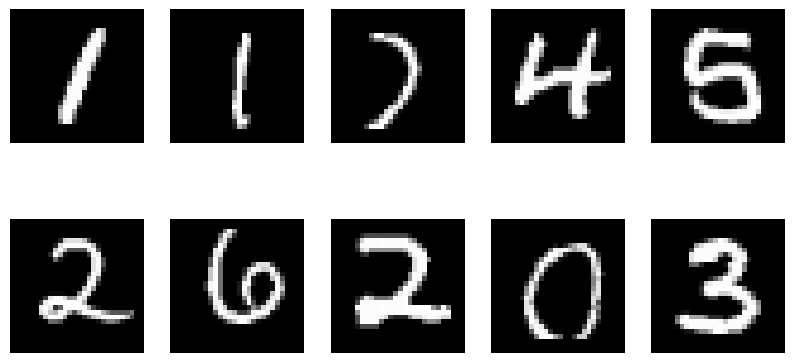

In [3]:

random_indices = np.random.choice(X_train.shape[0], 10, replace=False)

# Plot the images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
plt.show()

In [4]:
X_train.ndim

3

In [5]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
#Feature Scaling
X_train = X_train/255
X_test = X_test/255

In [8]:
#Split dataset
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)


In [9]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

c:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 804,554 (3.07 MB)

 Trainable params: 804,554 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
from tensorflow.keras.callbacks import TensorBoard
import os

# Create a logs directory
log_dir = os.path.join("logs", "fit", "model_1")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val),callbacks=[tensorboard_callback])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9025 - loss: 0.3302 - val_accuracy: 0.9762 - val_loss: 0.0792
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9815 - loss: 0.0597 - val_accuracy: 0.9811 - val_loss: 0.0585
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9891 - loss: 0.0348 - val_accuracy: 0.9839 - val_loss: 0.0559
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9936 - loss: 0.0207 - val_accuracy: 0.9860 - val_loss: 0.0470
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9951 - loss: 0.0146 - val_accuracy: 0.9867 - val_loss: 0.0487
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9971 - loss: 0.0096 - val_accuracy: 0.9850 - val_loss: 0.0581
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9969 - loss: 0.0091 - val_accuracy: 0.9862 - val_loss: 0.0542
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9982 - loss: 0

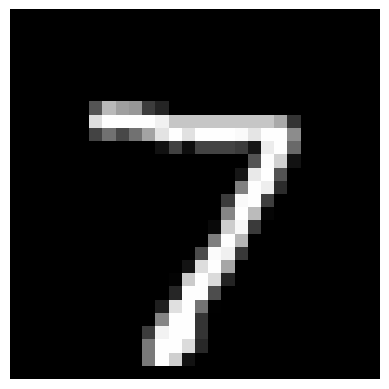

In [14]:
plt.imshow(X_test[0], cmap='gray')
plt.axis('off')
plt.show()

In [15]:
predict = np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))
print(f'Prediction: {predict}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Prediction: 7


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


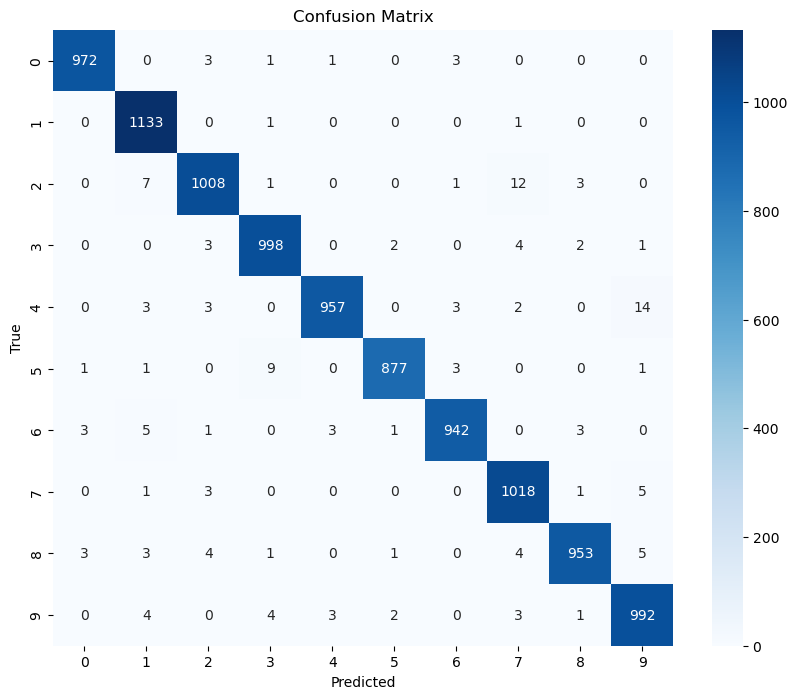

In [16]:
from sklearn.metrics import confusion_matrix

# Predict the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:


#tensorboard serve --logdir="C:\Users\Hp\OneDrive\Documents\NN scratch\logs\fit\model_1" --port=6006